# Linear Regression Analysis

This notebook performs the same steps as the script, but interactively with explanations.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("linearregression.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
# Target column
target = 'price'
y = df[target]
X = df.drop(columns=[target])

# Handle missing values
for col in X.columns:
    if X[col].dtype.kind in 'biufc':
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna(X[col].mode().iloc[0] if not X[col].mode().empty else '')

# One-hot encode
X = pd.get_dummies(X, drop_first=True)

# Align y
mask = y.notnull()
X = X.loc[mask]
y = y.loc[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

mae, mse, r2

(970043.403920164, 1754318687330.6643, 0.6529242642153184)

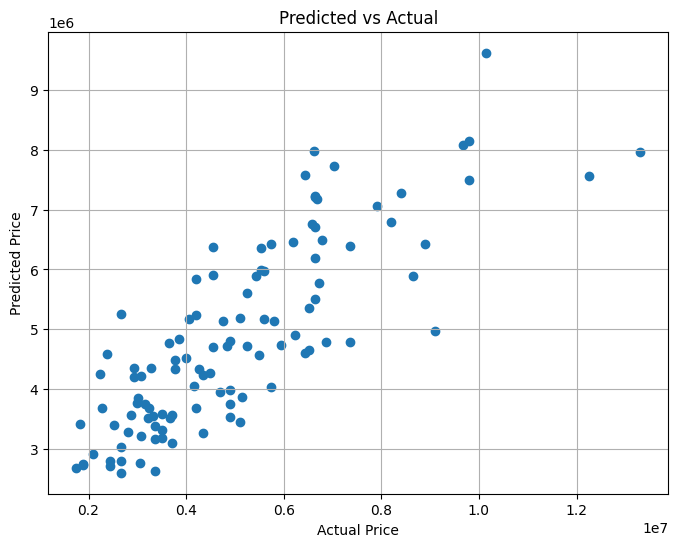

In [47]:
# Predicted vs Actual plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

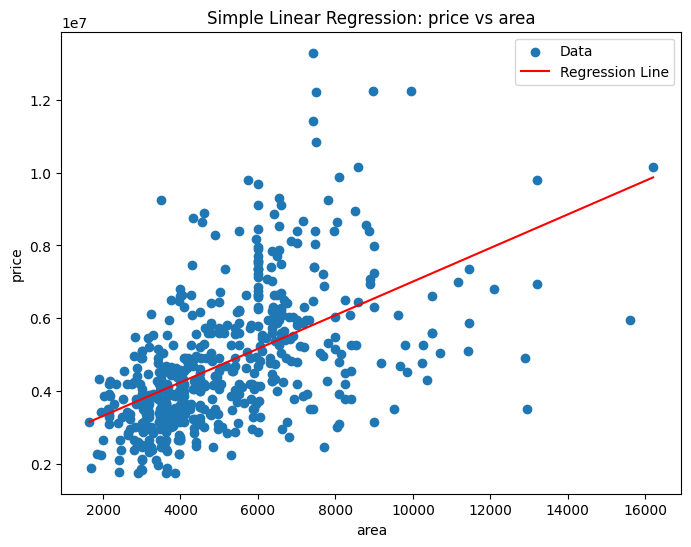

In [48]:
# Simple Linear Regression on top correlated feature
corrs = df.select_dtypes(include=[np.number]).corr()[target].drop(labels=[target])
top_feature = corrs.abs().sort_values(ascending=False).index[0]

from sklearn.linear_model import LinearRegression as LR
simple_df = df[[top_feature, target]].dropna()
Xs = simple_df[[top_feature]].values.reshape(-1,1)
ys = simple_df[target].values
simple_model = LR()
simple_model.fit(Xs, ys)

import numpy as np
xs_plot = np.linspace(Xs.min(), Xs.max(), 100).reshape(-1,1)
ys_plot = simple_model.predict(xs_plot)

plt.figure(figsize=(8,6))
plt.scatter(Xs, ys, label='Data')
plt.plot(xs_plot, ys_plot, color='red', label='Regression Line')
plt.xlabel(top_feature)
plt.ylabel(target)
plt.title(f"Simple Linear Regression: {target} vs {top_feature}")
plt.legend()
plt.show()